In [1]:
from mcmc import Sampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_theory(theta):
    return theta*x
std = 2
x,yobs = np.loadtxt('toydata.txt').T
cov = np.diag(np.ones_like(x)*std**2)
inv_cov = np.linalg.inv(cov)
theta=[-3,0,2]

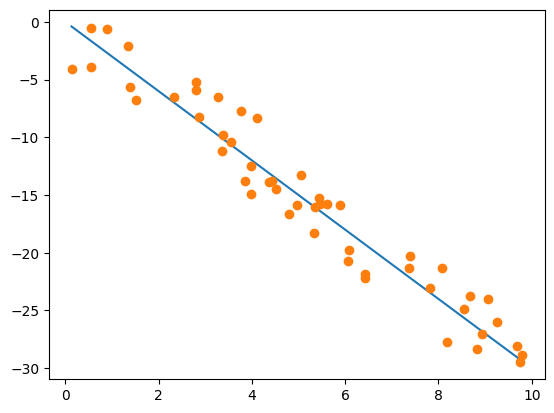

In [4]:
plt.plot(x,-3*x)
plt.plot(x,yobs,'o')

In [5]:
def loglkl(theta,**kwargs):
    theory = get_theory(theta)
    delta = theory-yobs
    return (-0.5*np.einsum('i,ij,j->',delta,inv_cov,delta))-0.5*np.log(2*np.pi*np.linalg.det(cov))
def log_prior(theta):
    if -5.0 < theta < 0.5 :
        return 0.0
    return -np.inf

def log_probability(theta,**kwargs):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglkl(theta,**kwargs)

def init_state():
    return theta[0]+np.random.uniform(-5,5,1)

In [6]:
s=Sampler(loglkl=log_probability,
         init_state=init_state,
         step_size=[1])


In [7]:
#chain=s.get_chain(1000)

/Users/zhiyulu/Documents/Github/CourseCosmology2024/Sampler/mcmc.py:40: RuntimeWarning: invalid value encountered in scalar divide
  accept_crit = propose_lk/self.curr_lk
/Users/zhiyulu/Documents/Github/CourseCosmology2024/Sampler/mcmc.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  accept_crit = propose_lk/self.curr_lk


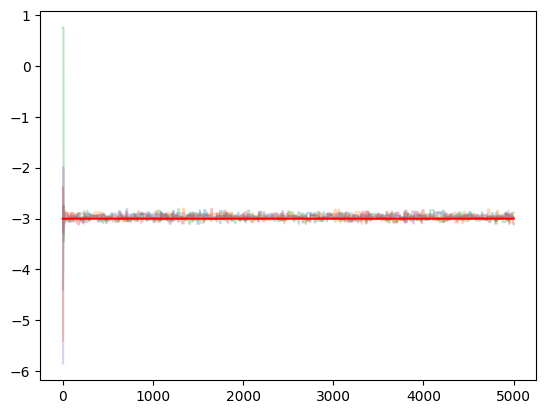

In [8]:
for i in range(5):
    chain=s.get_chain(5000)
    plt.plot(chain,alpha=0.3)
plt.plot(np.ones_like(chain)*theta[0],'r')

# emcee

In [9]:
import emcee

pos =  2*np.random.randn(4,1)
nwalkers, ndim = 4,1

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability
)
sampler.run_mcmc(pos, 5000, progress=True);

  0%|                                                  | 0/5000 [00:00<?, ?it/s]/Users/zhiyulu/Install/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 5000/5000 [00:00<00:00, 5008.34it/s]


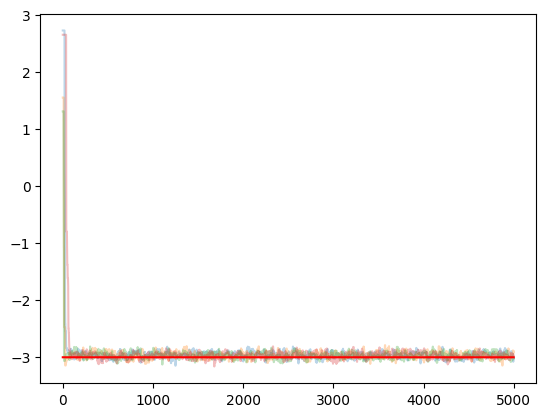

In [11]:
samps=sampler.get_chain()[:,:,0]
plt.plot(samps,alpha=0.3)
plt.plot(np.ones_like(samps[:,0])*theta[0],'r')